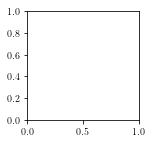

In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

%load_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm as tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
# import importlib
from IPython.display import display, HTML, Math, Latex
import pandas as pd
import pickle

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb
from codeStore import support_fun_baseflow as spf_bf
# %matplotlib notebook

from sympy.parsing import mathematica
import sympy
from sympy.printing.latex import LatexPrinter, print_latex
from sympy.utilities.lambdify import lambdify, lambdastr
import inspect

%matplotlib inline
params = {'animation.html': 'html5',
          'font.family':    'sans-serif'}
params['text.latex.preamble'] = [r'\usepackage{bm}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{amssymb}',
                                 r'\usepackage{mathrsfs}',
                                 r'\DeclareMathOperator{\Tr}{Tr}', ]
params['text.usetex'] = True
plt.rcParams.update(params)

PWD = os.getcwd()
np.set_printoptions(linewidth=120, precision=5)

fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)

In [4]:
0.5236 / np.pi, 1.0472 /  np.pi

(0.1666670564058328, 0.3333341128116656)

In [5]:
3 * 29

87

## mdf .pickle

In [38]:
# load_pickle = '/home/zhangji/stokes_flow_master/src/ellipsoidB05_baseFlow_theo.pickle'
# save_pickle = '/home/zhangji/stokes_flow_master/src/dbg_baseFlow.pickle'

load_pickle = '/home/zhangji/stokes_flow_master/src/ecoB01B05_4tail_baseFlow.pickle'
save_pickle = '/home/zhangji/stokes_flow_master/src/dbg_baseFlow.pickle'

with open(load_pickle, 'rb') as handle:
    tpick = pickle.load(handle)

uw_Base_list = tpick['uw_Base_list']
for ui in uw_Base_list:
    print(ui)

tw0 = uw_Base_list[2][5]
tw1 = (uw_Base_list[4][3] + uw_Base_list[5][4]) / 2
tw2 = (uw_Base_list[4][4] - uw_Base_list[5][3]) / 2
tw3 = uw_Base_list[9][5]
tu0 = uw_Base_list[2][2]
tu1 = (uw_Base_list[4][0] + uw_Base_list[5][1]) / 2
tu2 = (uw_Base_list[4][1] - uw_Base_list[5][0]) / 2
tu3 = uw_Base_list[9][2]

uw_Base_list2 = [np.zeros(6) for _ in range(10)]
uw_Base_list2[2][5] = tw0
uw_Base_list2[4][3] = tw1
uw_Base_list2[5][4] = tw1
uw_Base_list2[4][4] = tw2
uw_Base_list2[5][3] = -tw2
uw_Base_list2[9][5] = tw3

uw_Base_list2[2][2] = tu0
uw_Base_list2[4][0] = tu1
uw_Base_list2[5][1] = tu1
uw_Base_list2[4][1] = tu2
uw_Base_list2[5][0] = -tu2
uw_Base_list2[9][2] = tu3

print()
for ui in uw_Base_list2:
    print(ui)

tpick['uw_Base_list'] = uw_Base_list2
with open(save_pickle, 'wb') as handle:
    pickle.dump(tpick, handle, protocol=4)
print('save to %s' % save_pickle)

[  -0.00032   -0.00148    0.00005   -0.00087    0.99083    0.00000]
[  -0.00000    0.00000   -0.00000    0.00000   -0.00000    0.00000]
[  -0.00000   -0.00000   -0.02014    0.00000   -0.00000    0.04047]
[  -0.00000   -0.00000   -0.00000    0.00000   -0.00000   -0.00000]
[  -0.00064   -0.00295   -0.00000   -0.00174    0.98166   -0.00000]
[   0.00295   -0.00064    0.00000   -0.98166   -0.00174   -0.00000]
[   0.00000    0.00000   -0.00000    1.00000    0.00000    0.00000]
[  -0.00000   -0.00000   -0.00000   -0.00000    1.00000   -0.00000]
[  -0.00000    0.00000   -0.00000   -0.00000    0.00000    1.00000]
[  -0.00000   -0.00000    0.00103    0.00000   -0.00000   -0.60277]

[   0.00000    0.00000    0.00000    0.00000    0.00000    0.00000]
[   0.00000    0.00000    0.00000    0.00000    0.00000    0.00000]
[   0.00000    0.00000   -0.02014    0.00000    0.00000    0.04047]
[   0.00000    0.00000    0.00000    0.00000    0.00000    0.00000]
[  -0.00064   -0.00295    0.00000   -0.00174   

In [42]:
t_theta, t_phi, t_psi = 0, 0, 0
# t_theta, t_phi, t_psi = np.pi / 2, 0, np.pi / 2
# max_t, eval_dt = 0.1, 0.01
# update_fun, rtol, atol = '1fe', 1e-9, 1e-12
max_t, eval_dt = 10, 0.0001
update_fun, rtol, atol = '5bs', 1e-9, 1e-12
save_every = 1
omega_tail = 0
# table_name2 = 'ecoB01B05_baseFlow'
table_name2 = 'dbg_baseFlow'
# table_name2 = 'ellipsoidB05_baseFlow_theo'
# table_name2 = 'ellipsoidB05_act_baseFlow'
ABCFlowkwargs = {'ABC_A': 1, 
                 'ABC_B': 1, 
                 'ABC_C': 1, 
                 'name':  'ABCFlowProblem'}
ini_center = np.array((0, 0, 0))
problemHandle=jm.ABCFlowProblem

# check rotational symmetric
rotM0 = Rloc2glb(t_theta, t_phi, t_psi)
rotM1 = np.array((rotM0[:, 1], rotM0[:, 2], rotM0[:, 0])).T
rotM2 = np.array((rotM0[:, 2], rotM0[:, 0], rotM0[:, 1])).T
q0 = Quaternion()
q0.from_matrix(rotM0)
q1 = Quaternion()
q1.from_matrix(rotM1)
q2 = Quaternion()
q2.from_matrix(rotM2)
theta0, phi0, psi0 = q0.get_thphps()
theta1, phi1, psi1 = q1.get_thphps()
theta2, phi2, psi2 = q2.get_thphps()
# display(Math('\\theta_{ini} = %.4f, \\phi_{ini} = %.4f, \\psi_{ini} = %.4f, ' % (theta0, phi0, psi0)))
# display(Math('\\theta_{ini} = %.4f, \\phi_{ini} = %.4f, \\psi_{ini} = %.4f, ' % (theta1, phi1, psi1)))
# display(Math('\\theta_{ini} = %.4f, \\phi_{ini} = %.4f, \\psi_{ini} = %.4f, ' % (theta2, phi2, psi2)))
display(Math('\\boldsymbol p_1 = (%.2f, %.2f, %.2f), \\boldsymbol p_2 = (%.2f, %.2f, %.2f)' % \
             (rotM0[0, 2], rotM0[1, 2], rotM0[2, 2], rotM0[0, 0], rotM0[1, 0], rotM0[2, 0], )))
display(Math('\\boldsymbol p_1 = (%.2f, %.2f, %.2f), \\boldsymbol p_2 = (%.2f, %.2f, %.2f)' % \
             (rotM1[0, 2], rotM1[1, 2], rotM1[2, 2], rotM1[0, 0], rotM1[1, 0], rotM1[2, 0], )))
display(Math('\\boldsymbol p_1 = (%.2f, %.2f, %.2f), \\boldsymbol p_2 = (%.2f, %.2f, %.2f)' % \
             (rotM2[0, 2], rotM2[1, 2], rotM2[2, 2], rotM2[0, 0], rotM2[1, 0], rotM2[2, 0], )))

tdata0 = spf_bf.do_GivenFlowObj(theta0, phi0, psi0, max_t, table_name=table_name2, 
                                update_fun=update_fun, rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                save_every=save_every, tqdm_fun=tqdm_notebook, 
                                omega_tail=omega_tail, ini_center=ini_center, 
                                problemHandle=problemHandle, **ABCFlowkwargs)

tdata1 = spf_bf.do_GivenFlowObj(theta1, phi1, psi1, max_t, table_name=table_name2, 
                                update_fun=update_fun, rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                save_every=save_every, tqdm_fun=tqdm_notebook, 
                                omega_tail=omega_tail, ini_center=ini_center, 
                                problemHandle=problemHandle, **ABCFlowkwargs)

tdata2 = spf_bf.do_GivenFlowObj(theta2, phi2, psi2, max_t, table_name=table_name2, 
                                update_fun=update_fun, rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                save_every=save_every, tqdm_fun=tqdm_notebook, 
                                omega_tail=omega_tail, ini_center=ini_center, 
                                problemHandle=problemHandle, **ABCFlowkwargs)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

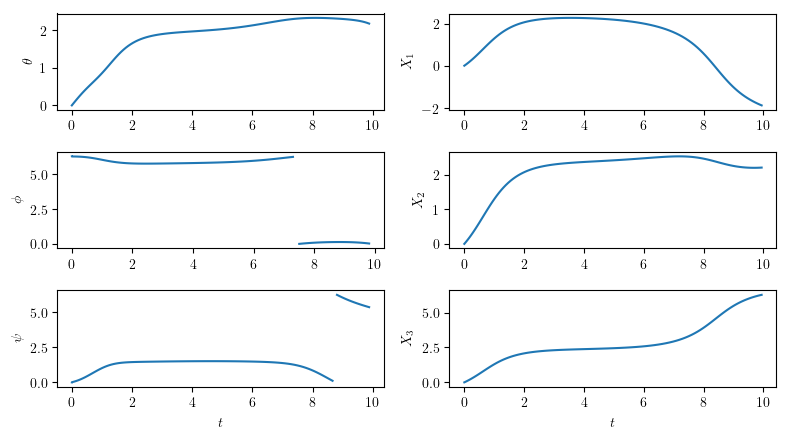

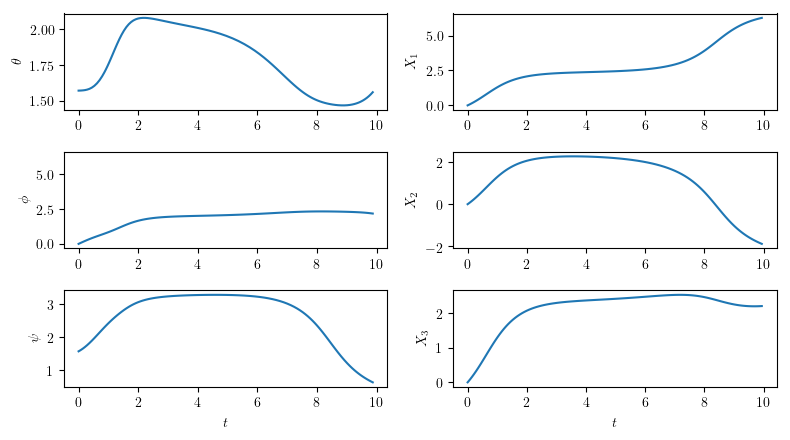

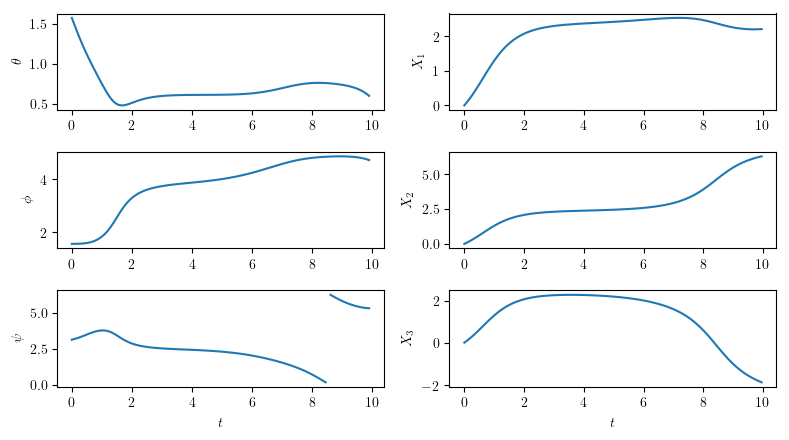

In [58]:
%matplotlib inline
figsize, dpi = np.array((16, 9)) * 0.5, 100 
base_t_min, base_t_max = 0, np.inf
show_handle = spf_bf.core_show_thphps_X_t

for use_data in (tdata0, tdata1, tdata2):
    base_t, base_dt, base_X, base_thphps, base_U, base_W, base_psi_t = use_data
    tidx = (base_t >= base_t_min) * (base_t <= base_t_max)
    spf_bf.show_fun(show_handle, base_t[tidx], base_thphps[tidx], base_psi_t[tidx], base_X[tidx], 
                    figsize=figsize, dpi=dpi)

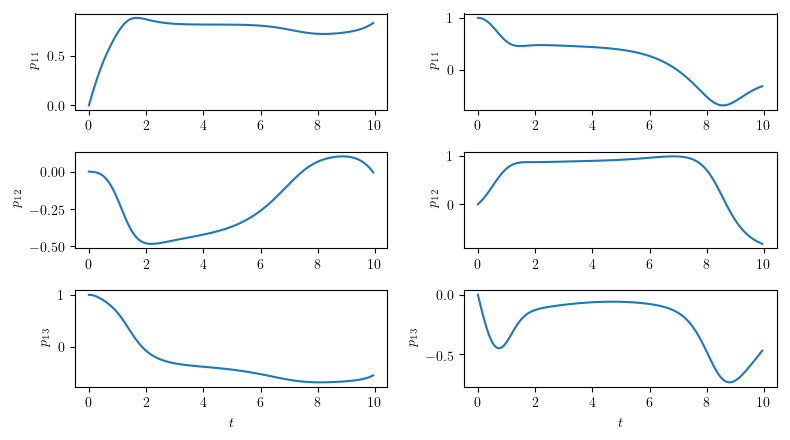

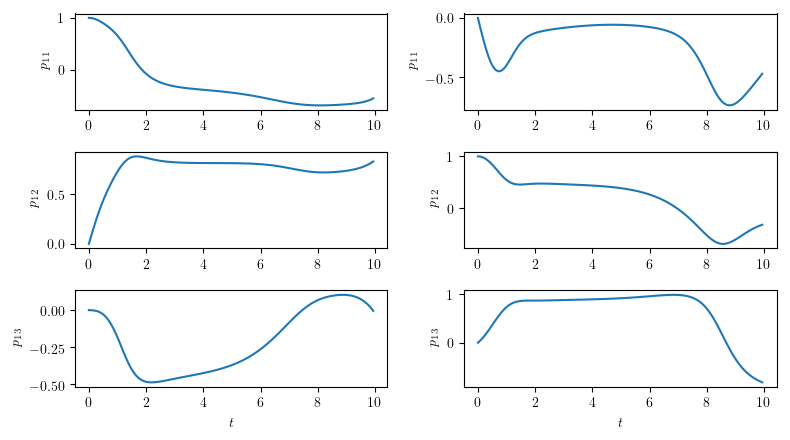

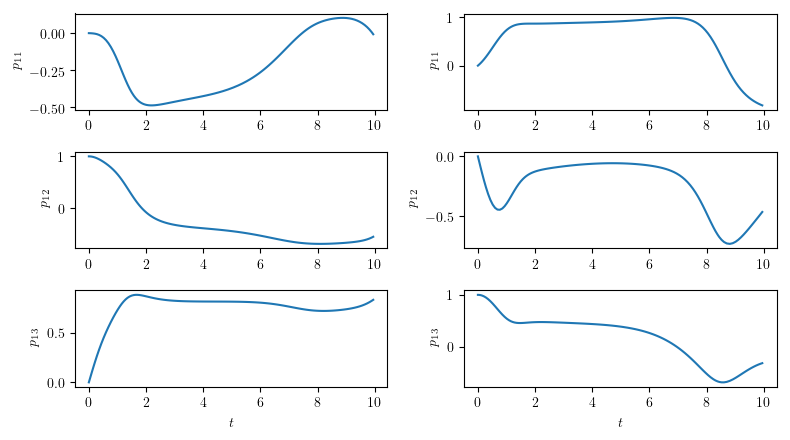

In [44]:
%matplotlib inline
figsize, dpi = np.array((16, 9)) * 0.5, 100 
base_t_min, base_t_max = 0, np.inf
show_handle = spf_bf.core_show_P1P2_t

for use_data in (tdata0, tdata1, tdata2):
    base_t, base_dt, base_X, base_thphps, base_U, base_W, base_psi_t = use_data
    tidx = (base_t >= base_t_min) * (base_t <= base_t_max)
    spf_bf.show_fun(show_handle, base_t[tidx], base_thphps[tidx], base_psi_t[tidx], 
                    figsize=figsize, dpi=dpi)

## varify the method of base flow for the ABC flow
current version fix_x=True, fix_y=True, fix_z=True

In [57]:
ini_theta, ini_phi, ini_psi = 0, 0, 0
# ini_theta, ini_phi, ini_psi = np.random.sample(3) * (1, 2, 2) * np.pi
ini_center = np.array((0, 0, 0))
ini_t, max_t = 0, 0.01
update_fun = '1fe'
rtol, atol = 1e-9, 1e-12
eval_dt = 0.01
save_every = 1
omega_tail = 0
table_name = 'ABC_dbg_baseFlow'
dbg_DEF, dbg_G, dbg_H, dbg_I = (np.random.sample(4) - 0.5) * 2 * np.pi * (0.01, 1, 1, 1)
problem_kwargs = {'ABC_A': 1, 
                  'ABC_B': 1, 
                  'ABC_C': 1, 
                  'ABC_D': dbg_DEF, 
                  'ABC_E': dbg_DEF, 
                  'ABC_F': dbg_DEF, 
                  'ABC_G': dbg_G, 
                  'ABC_H': dbg_H, 
                  'ABC_I': dbg_I, 
                  'name':  'ABC_dbg'}
problemHandle = jm.ABCFlowProblem_DEFHIJ

problem = problemHandle(**problem_kwargs)
obj_kwargs = spf_bf.do_GivenFlowObj_kwargs(ini_center, ini_theta, ini_phi, ini_psi,
                                           omega_tail=omega_tail, table_name=table_name,
                                           name='GivenFlowObj')
obj = jm.GivenFlowObj(**obj_kwargs)
obj.set_update_para(fix_x=True, fix_y=True, fix_z=True, update_fun=update_fun,
                    rtol=rtol, atol=atol, save_every=save_every, tqdm_fun=tqdm_notebook)
problem.add_obj(obj)
# base_t, base_dt, base_X, base_thphps, base_U, base_W, base_psi_t \
#     = obj.update_self(t0=ini_t, t1=max_t, eval_dt=eval_dt)

Rlog2glb = Rloc2glb(ini_theta, ini_phi, ini_psi)
Up, Wp = obj.calc_Up_fun(ini_theta, ini_phi, ini_psi, ini_center, Rlog2glb)
print('Up', Up)
print('Wp', Wp)

ts = '\n' 
ts = ts + 'mpirun -n 4 python ../ecoli_ABC_Flow.py -main_fun_ABC 1 -sm lg_rs -legendre_m 3 -legendre_k 2 -epsilon 3.000000 -rh11 0.100000  -rh12 0.100000  -rh2 0.030000  -ch 1.000000  -nth 12  -eh 0  -ph 0.666667  -hfct 1.000000  -n_tail 1  -with_cover 2  -left_hand 0  -rs1 0.5  -rs2 0.5  -ds 0.05  -es 0  -with_T_geo 0  -dist_hs 0.500000  -ksp_max_it 100  -plot_geo 0  -ffweight 2.000000  -f ABC_dbg '
ts = ts + ' -ini_theta %.4f -ini_phi %.4f -ini_psi %.4f ' % (ini_theta, ini_phi, ini_psi)
ts = ts + ''.join([' -%s %.6f' % (i0, problem_kwargs[i0]) for i0 in problem_kwargs.keys() if 'ABC' in i0])
print(ts)


Up [  -0.95170    1.64168   -0.29683]
Wp [   0.00075   -0.00313    0.00052]

mpirun -n 4 python ../ecoli_ABC_Flow.py -main_fun_ABC 1 -sm lg_rs -legendre_m 3 -legendre_k 2 -epsilon 3.000000 -rh11 0.100000  -rh12 0.100000  -rh2 0.030000  -ch 1.000000  -nth 12  -eh 0  -ph 0.666667  -hfct 1.000000  -n_tail 1  -with_cover 2  -left_hand 0  -rs1 0.5  -rs2 0.5  -ds 0.05  -es 0  -with_T_geo 0  -dist_hs 0.500000  -ksp_max_it 100  -plot_geo 0  -ffweight 2.000000  -f ABC_dbg  -ini_theta 0.0000 -ini_phi 0.0000 -ini_psi 0.0000  -ABC_C 1.000000 -ABC_I 2.654199 -ABC_D -0.003372 -ABC_E -0.003372 -ABC_B 1.000000 -ABC_G -0.068131 -ABC_H 2.442069 -ABC_F -0.003372 -ABC_A 1.000000


In [54]:
ts = '\n' 
ts = ts + 'mpirun -n 4 python ../ecoli_ABC_Flow.py -main_fun_ABC 1 -sm lg_rs -legendre_m 3 -legendre_k 2 -epsilon 3.000000 -rh11 0.100000  -rh12 0.100000  -rh2 0.030000  -ch 1.000000  -nth 12  -eh 0  -ph 0.666667  -hfct 1.000000  -n_tail 1  -with_cover 2  -left_hand 0  -rs1 0.5  -rs2 0.5  -ds 0.05  -es 0  -with_T_geo 0  -dist_hs 0.500000  -ksp_max_it 100  -plot_geo 0  -ffweight 2.000000  -f ABC_dbg '
ts = ts + ' -ini_theta %.4f -ini_phi %.4f -ini_psi %.4f ' % (ini_theta, ini_phi, ini_psi)
ts = ts + ''.join([' -%s %.6f' % (i0, problem_kwargs[i0]) for i0 in problem_kwargs.keys() if 'ABC' in i0])
print(ts)



mpirun -n 4 python ../ecoli_ABC_Flow.py -main_fun_ABC 1 -sm lg_rs -legendre_m 3 -legendre_k 2 -epsilon 3.000000 -rh11 0.100000  -rh12 0.100000  -rh2 0.030000  -ch 1.000000  -nth 12  -eh 0  -ph 0.666667  -hfct 1.000000  -n_tail 1  -with_cover 2  -left_hand 0  -rs1 0.5  -rs2 0.5  -ds 0.05  -es 0  -with_T_geo 0  -dist_hs 0.500000  -ksp_max_it 100  -plot_geo 0  -ffweight 2.000000  -f ABC_dbg  -ini_theta 0.0000 -ini_phi 0.0000 -ini_psi 0.0000  -ABC_C 1.000000 -ABC_I 1.000000 -ABC_D 1.000000 -ABC_E 1.000000 -ABC_B 1.000000 -ABC_G 1.000000 -ABC_H 1.000000 -ABC_F 1.000000 -ABC_A 1.000000


In [20]:
# simple shear case, for dbg

ini_theta, ini_phi, ini_psi = 0, 0, 0
ini_center = np.array((0, 0, 0))
ini_t, max_t = 0, 0.01
update_fun = '1fe'
rtol, atol = 1e-9, 1e-12
eval_dt = 0.01
save_every = 1
omega_tail = 0
table_name = 'ABC_dbg_baseFlow'
problem_kwargs = {'planeShearRate': np.array((1, 0, 0)), }
problemHandle = jm.ShearJefferyProblem

problem = problemHandle(**problem_kwargs)
obj_kwargs = spf_bf.do_GivenFlowObj_kwargs(ini_center, ini_theta, ini_phi, ini_psi,
                                           omega_tail=omega_tail, table_name=table_name,
                                           name='GivenFlowObj')
obj = jm.GivenFlowObj(**obj_kwargs)
obj.set_update_para(fix_x=True, fix_y=True, fix_z=True, update_fun=update_fun,
                    rtol=rtol, atol=atol, save_every=save_every, tqdm_fun=tqdm_notebook)
problem.add_obj(obj)
# base_t, base_dt, base_X, base_thphps, base_U, base_W, base_psi_t \
#     = obj.update_self(t0=ini_t, t1=max_t, eval_dt=eval_dt)

Rlog2glb = Rloc2glb(ini_theta, ini_phi, ini_psi)
Up, Wp = obj.calc_Up_fun(ini_theta, ini_phi, ini_psi, ini_center, Rlog2glb)
print('Up', Up)
print('Wp', Wp)


Up [   0.05767   -0.00362    0.00021]
Wp [  -0.00508    0.80559   -0.00217]
